Name: Sakshi Mahendra Naik, Roll No: 15

**Practical 4: Image Enhancement Using Neighborhood Processing**

In [ ]:
# Image Enhancement Using Neighborhood Processing #
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from google.colab import files
from skimage import color
from skimage import io
from PIL import ImageDraw
from skimage.util import random_noise
figsize = (6, 6)
import random

In [ ]:
uploaded=files.upload()

Saving Peacock.bmp to Peacock.bmp


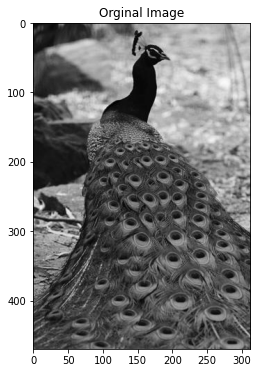

In [ ]:
im = cv2.imread('Peacock.bmp')
img=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
plt.figure(figsize = figsize)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.title("Orginal Image")
plt.show()

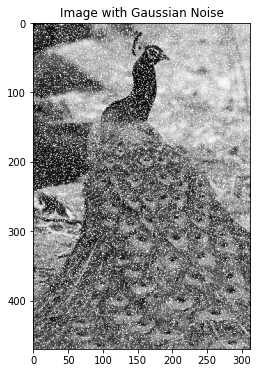

In [ ]:
## Image with Gaussian Noise ##
img1 = cv2.imread('Peacock.bmp', 0)
# Generating Gaussian noise
gauss = np.random.normal(0, 1, img1.size)
gauss = gauss.reshape(img1.shape[0], img1.shape[1]).astype('uint8')
# Adding gaussian noise to the image
img2 = cv2.add(img1, gauss)
plt.figure(figsize = figsize)
plt.imshow(img2, cmap="gray", vmin = 0, vmax = 255)
plt.title('Image with Gaussian Noise')
plt.show()

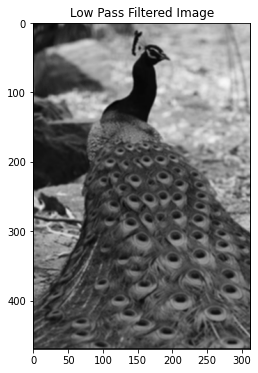

In [ ]:
## Low Pass Filtering ##

img1 = cv2.imread('Peacock.bmp', 0)
# Generating Gaussian noise
gauss = np.random.normal(0, 1, img1.size)
gauss = gauss.reshape(img1.shape[0], img1.shape[1]).astype('uint8')
# Adding gaussian noise to the image
img2 = cv2.add(img1, gauss)

m = img2.shape[0]
n = img2.shape[1]
#print(m)
#print(n)

#Develop Averaging filter (3,3) mask
mask = np.ones([3,3], dtype = int)
mask = mask / 9
# Convolve the 3x3 mask over the image
img_new = np.zeros([m,n])
for i in range(1, m-1):
  for j in range(1, n-1):
    temp = img[i-1, j-1]*mask[0, 0] + img[i-1, j]*mask[0, 1] + img[i-1, j+1]*mask[0, 2] + img[i, j-1]*mask[1, 0] + img[i, j]*mask[1, 1] + img[i, j+1]*mask[1,2] + img[i+1, j-1]*mask[2, 0] + img[i+1, j]*mask[2, 1] + img[i+1, j+1]*mask[2, 2]
    img_new[i, j] = temp
    img_new = img_new.astype(np.uint8)
plt.figure(figsize = figsize)
plt.imshow(img_new, cmap="gray", vmin = 0, vmax = 255)
plt.title('Low Pass Filtered Image')
plt.show()

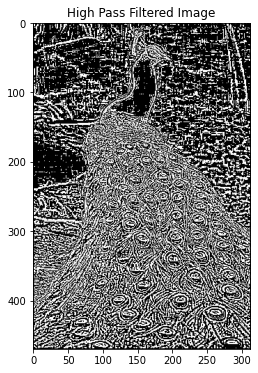

In [ ]:
## High Pass Filtering ##

m = img.shape[0]
n = img.shape[1]
#print(m)
#print(n)
#Develop Averaging filter (3,3) mask
mask = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
mask = mask / 9
# Convolve the 3x3 mask over the image
img_new = np.zeros([m,n])
for i in range(1, m-1):
  for j in range(1, n-1):
    temp = img[i-1, j-1]*mask[0, 0] + img[i-1, j]*mask[0, 1] + img[i-1, j+1]*mask[0, 2] + img[i, j-1]*mask[1, 0] + img[i, j]*mask[1, 1] + img[i, j+1]*mask[1,2] + img[i+1, j-1]*mask[2, 0] + img[i+1, j]*mask[2, 1] + img[i+1, j+1]*mask[2, 2]
    img_new[i, j] = temp
    img_new = img_new.astype(np.uint8)
plt.figure(figsize = figsize)
plt.imshow(img_new, cmap="gray", vmin = 0, vmax = 255)
plt.title('High Pass Filtered Image')
plt.show()

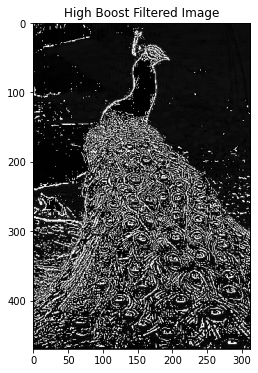

In [ ]:
## Highboost Filtering ##

# img=cv2.imread('Peacock.bmp',0)
 
# lista = list.sort(lista)
m=img.shape[0]
n=img.shape[1]
#print (m)
#print(n)
#Develop Averaging filter (3, 3) mask
mask = np.array([[-1,-1,-1],[-1,8.6,-1],[-1,-1,-1]])
mask = mask / 9
#convolve the 3X3 mask over the image
img_new = np.zeros ([m,n])
for i in range(1, m-1):
  for j in range(1, n-1):
    temp = img[i-1,j-1]*mask[0,0]+ img[i-1,j]*mask[0,1] + img[i-1,j+1]*mask[0,2] + img[i,j-1]*mask[1,0] + img[i,j]*mask[1,1] + img[i,j+1]*mask[1,2] + img[i+1,j-1]*mask[2,0] + img[i+1,j]*mask[2,1] + img[i+1,j+1]*mask[2,2]
    img_new[i, j]= temp
    img_new = img_new.astype(np.uint8)

plt.figure(figsize=figsize)
plt.imshow(img_new,cmap="gray",vmin=0, vmax=256)
plt.title("High Boost Filtered Image")
plt.show()

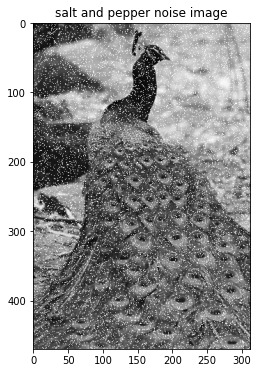

In [ ]:
## Image with Salt and Pepper Noise ##
def add_noise (img):
  #Getting the dimensions of the image
  row, col = img.shape;
  #randomly pick some pixels in the
  #image for coloring them white
  #pick a random number between300 and 10000
  numbers_of_pixels=random.randint(300,10000)
  for i in range(numbers_of_pixels):
    #pick a random y coordinate
    y_coord=random.randint(0,row-1)
    #pick a random x coordinate
    x_coord=random.randint(0,col-1)
    #color the pixels to white
    img[y_coord][x_coord]=255
  #randomly pick some pixels in the
  #image for coloring them black
  #pick a random number between300 and 10000
  numbers_of_pixels=random.randint(300,10000)
  for i in range(numbers_of_pixels):
    #pick a random y coordinate
    y_coord=random.randint(0,row-1)
    #pick a random x coordinate
    x_coord=random.randint(0,col-1)
    #color the pixels to black
    img[y_coord][x_coord]=255
  return img
# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
img = cv2.imread('Peacock.bmp',cv2.IMREAD_GRAYSCALE)
#Storing the image
img_new1=add_noise(img)
plt.figure(figsize=figsize)
plt.imshow(img_new1,cmap="gray",vmin=0, vmax=256)
plt.title("salt and pepper noise image")
plt.show()

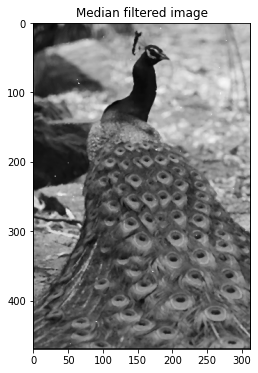

In [ ]:
## Median Filtering ##

img_noisy1 = img_new1
m= img_noisy1.shape[0]
n= img_noisy1.shape[1]
# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the center pixel by the median
img_new2 = np.zeros([m, n])
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = [img_noisy1[i-1, j-1],
               img_noisy1[i-1, j],
               img_noisy1[i-1, j + 1],
               img_noisy1[i, j-1],
               img_noisy1[i, j],
               img_noisy1[i, j + 1],
               img_noisy1[i + 1, j-1],
               img_noisy1[i + 1, j],
               img_noisy1[i + 1, j + 1]]
        temp = sorted(temp)
        img_new2[i, j]= temp[5]
        img_new2 = img_new2.astype(np.uint8)
plt.figure(figsize=figsize)
plt.imshow(img_new2,cmap="gray",vmin=0, vmax=256)
plt.title("Median filtered image")
plt.show()

In [ ]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Practical 4.ipynb')